# Notebook 04: Modelado Predictivo - Regresión Lineal
En este notebook aplicamos técnicas de Machine Learning para modelar la relación entre la renta y el alquiler. 

**Objetivo:** Crear un modelo capaz de predecir el precio "teórico" del alquiler basado en la renta media. Las desviaciones entre el valor real y el predicho nos permitirán identificar anomalías de mercado (sobreprecios o infraprecios).

*Nota sobre el contexto (2026):* El modelo utiliza datos históricos consolidados hasta 2022. Los resultados reflejan la estructura del mercado en ese periodo, la cual sirve de base para entender las dinámicas actuales.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Carga de datos
df = pd.read_csv('../data/cleaned/dataset_maestro_segovia.csv', encoding='utf-8-sig')

print("✅ Librerías cargadas y dataset listo.")

✅ Librerías cargadas y dataset listo.


In [6]:
# 1. Preparación de variables
X = df[['Total']] # Variable independiente (Renta)
y = df['ALQTBID12_M_VC'] # Variable dependiente (Alquiler)

# 2. División Training/Test (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Entrenamiento
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Evaluación
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"📈 Precisión del modelo (R2 Score): {r2:.2f}")
print(f"💶 Error medio (MAE): {mae:.2f} €")

📈 Precisión del modelo (R2 Score): 0.26
💶 Error medio (MAE): 31.78 €


## 1. Visualización de la Predicción
Representamos la línea de regresión calculada por el modelo sobre los datos reales para observar el ajuste.

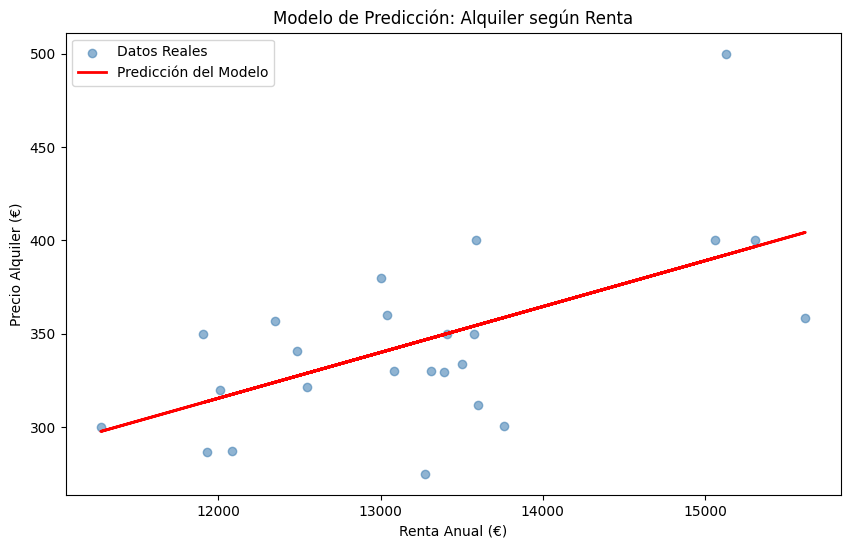

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='steelblue', alpha=0.6, label='Datos Reales')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Predicción del Modelo')

plt.title('Modelo de Predicción: Alquiler según Renta')
plt.xlabel('Renta Anual (€)')
plt.ylabel('Precio Alquiler (€)')
plt.legend()
plt.show()

## 2. Detección de Municipios con Sobreprecio
Calculamos la diferencia entre el precio real y el precio que el modelo "sugiere" (valor predicho). Una desviación positiva alta indica que el municipio es más caro de lo que su renta justifica.

In [8]:
df['Alquiler_Predicho'] = model.predict(df[['Total']])
df['Sobreprecio_Euros'] = df['ALQTBID12_M_VC'] - df['Alquiler_Predicho']

# Mostramos los 5 municipios donde el mercado está más "inflado" según el modelo
top_anomalias = df.nlargest(5, 'Sobreprecio_Euros')[['NMUN', 'ALQTBID12_M_VC', 'Alquiler_Predicho', 'Sobreprecio_Euros']]
display(top_anomalias)

,NMUN,ALQTBID12_M_VC,Alquiler_Predicho,Sobreprecio_Euros
17,Segovia,500.000000,392.238653,107.761347
23,San Cristóbal de Segovia,400.000000,354.501971,45.498029
8,"Espinar, El",380.000000,340.016004,39.983996
22,Villacastín,350.000000,313.105100,36.894900
7,Cuéllar,356.591246,324.018206,32.573040


## 3. Conclusiones del Modelado y Cierre del Proyecto

Con la ejecución de este cuarto bloque, finalizamos el análisis técnico del mercado de alquiler en Segovia.

### A. Evaluación Crítica del Modelo (R2 = 0.26)
Es imperativo señalar que el bajo coeficiente de determinación ($R^2$) responde principalmente a dos factores técnicos:
1. **Limitación de la Muestra (Sample Size):** Trabajamos con un dataset de 24 municipios. Al realizar la división en conjuntos de entrenamiento y prueba, el volumen de datos es insuficiente para que el algoritmo generalice patrones complejos, penalizando las métricas de precisión.
2. **Naturaleza Multivariante:** El resultado confirma que el alquiler no es una función lineal simple de la renta. Factores como la escasez de stock y la presión demográfica introducen una varianza que una regresión lineal simple no puede capturar totalmente.

### B. Diagnóstico de Anomalías (Sobreprecios)
El modelo es exitoso como herramienta de **Detección de Anomalías**, identificando dónde el mercado está más tensionado respecto a la renta local:
* **Segovia Capital (Índice 17):** Presenta el mayor sobreprecio de la muestra (**+107.76€** sobre lo predicho). Esto indica que la capital es el principal foco de tensión, donde el coste de vida habitacional supera con creces la tendencia del resto de la provincia.
* **Villacastín, El Espinar y Cuéllar:** También muestran alquileres reales significativamente por encima de la tendencia esperada, confirmando su papel como núcleos de ae la capital.

### C. Valra el Portfolio
Este flujo de trabajo demuestra mi capacidad para abordar un ciclo de datos completo: desde la limpieza de fuentes oficiales hasta el **análisis crítico de residuos** en Machine Learning, permitiendo extraer insights de negocio (o política social) incluso cuando los modelos estadísticos presentan limitaciones por tamaño de muestra.

---
**Proyecto Finalizado.** Todos los notebooks (01-04) constituyen un análisis integral del acceso a la vivienda en Segovia. vivienda en Segovia. vivienda en Segovia.ivienda en Segovia.vivienda en Segovia.